In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from LinearMPC_template.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 15; H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 1.5
rocket.fuel_rate = 0.0
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.60: 
 State

Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x111a26140> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Context object at 0x111a26140> is already entered
Exception in callback Task.__step()
handle: <Handle Task.__step()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mpc2025project/lib/python3.12/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
RuntimeError: cannot enter context: <_contextvars.Contex

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

We now compare the performance of the Part 4 controller (without offset-free tracking) against the Part 5 controller (with offset-free tracking) when the rocket mass is changed to 1.5 kg (different from the modeled mass used for linearization).

The Part 4 controller does not compensate for the mass mismatch, leading to a steady-state offset in z-velocity tracking. The Part 5 controller uses an augmented observer to estimate and reject the disturbance caused by the mass difference.


In [ ]:
# Import Part 3 controller (without offset-free tracking) for comparison
from Deliverable_3_3.LinearMPC_template.MPCVelControl import MPCVelControl as MPCVelControl_Part3

# Create a fresh rocket instance for Part 3 simulation (no offset-free)
rocket_part3 = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc_part3 = MPCVelControl_Part3().new_controller(rocket_part3, Ts, H)

rocket_part3.mass = 1.5
rocket_part3.fuel_rate = 0.0

t_cl_p3, x_cl_p3, u_cl_p3, t_ol_p3, x_ol_p3, u_ol_p3, ref_p3 = rocket_part3.simulate_control(
    mpc_part3, sim_time, H, x0, x_target=x_target, method='nonlinear'
)

print("Part 3 simulation complete (without offset-free tracking).")


Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
Simulating time 0.30: 
 State beta violation: -0.24 < -0.17, 
 State alpha violation: 0.24 > 0.17, 
Simulating time 0.35: 
 State beta violation: -0.27 < -0.17, 
 State alpha violation: 0.29 > 0.17, 
Simulating time 0.40: 
 State beta violation: -0.31 < -0.17, 
 State alpha violation: 0.33 > 0.17, 
Simulating time 0.45: 
 State beta violation: -0.35 < -0.17, 
 State alpha violation: 0.37 > 0.17, 
Simulating time 0.50: 
 State beta violation: -0.38 < -0.17, 
 State alpha violation: 0.42 > 0.17, 
Simulating time 0.55: 
 State beta violation: -0.42 < -0.17, 
 State alpha violation: 0.47 > 0.17, 
Simulating time 0.60: 
 State beta violation: -0.45 < -0.17, 
 State alpha violation: 0.52 > 0.17, 
Simulating time 0.65: 
 State beta violation: -0.49 < -0.17, 
 State alpha violation:

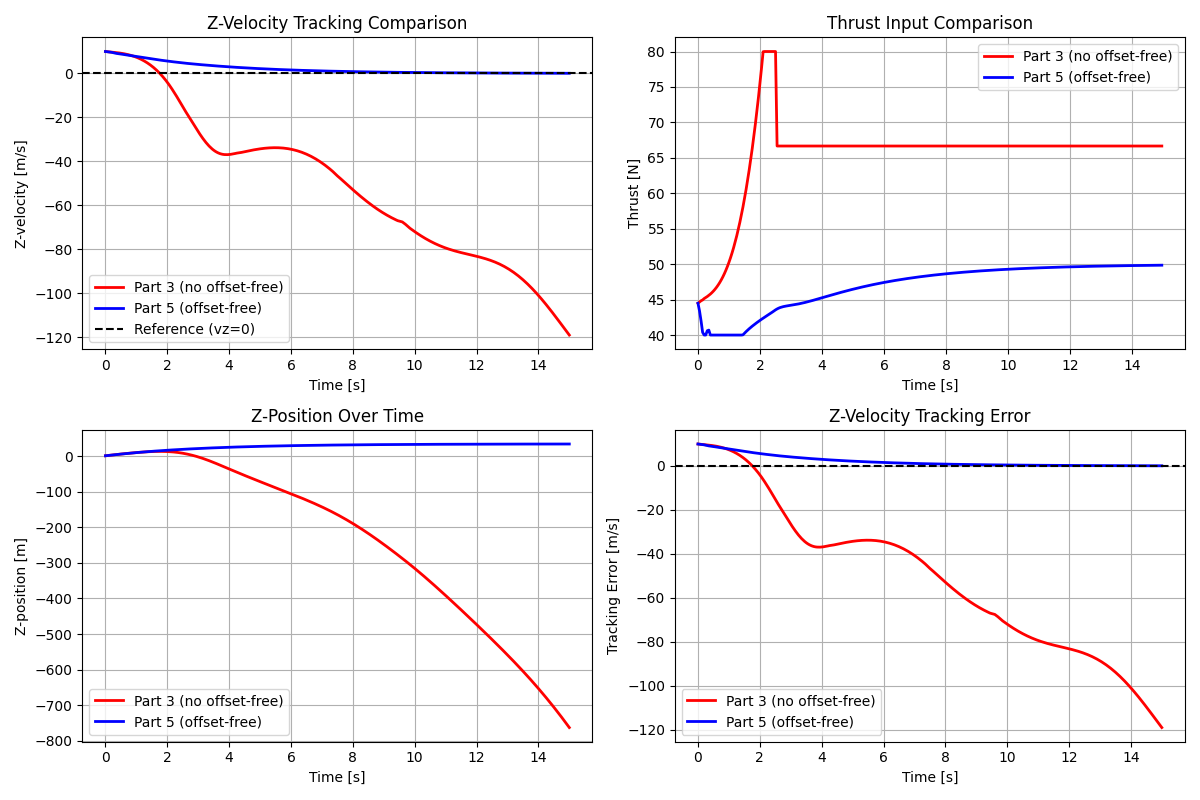


=== Steady-State Comparison (last 2 seconds average) ===
Part 3 z-velocity steady-state: -102.0748 m/s (offset: -102.0748 m/s)
Part 5 z-velocity steady-state: 0.1245 m/s (offset: 0.1245 m/s)


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Z-velocity comparison (index 8)
axes[0, 0].plot(t_cl_p3, x_cl_p3[8, :], 'r-', label='Part 3 (no offset-free)', linewidth=2)
axes[0, 0].plot(t_cl, x_cl[8, :], 'b-', label='Part 5 (offset-free)', linewidth=2)
axes[0, 0].axhline(y=0, color='k', linestyle='--', label='Reference (vz=0)')
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Z-velocity [m/s]')
axes[0, 0].set_title('Z-Velocity Tracking Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Thrust input comparison (index 2)
axes[0, 1].plot(t_cl_p3[:-1], u_cl_p3[2, :], 'r-', label='Part 3 (no offset-free)', linewidth=2)
axes[0, 1].plot(t_cl[:-1], u_cl[2, :], 'b-', label='Part 5 (offset-free)', linewidth=2)
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Thrust [N]')
axes[0, 1].set_title('Thrust Input Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Z-position comparison (index 11)
axes[1, 0].plot(t_cl_p3, x_cl_p3[11, :], 'r-', label='Part 3 (no offset-free)', linewidth=2)
axes[1, 0].plot(t_cl, x_cl[11, :], 'b-', label='Part 5 (offset-free)', linewidth=2)
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Z-position [m]')
axes[1, 0].set_title('Z-Position Over Time')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Tracking error comparison
error_p3 = x_cl_p3[8, :] - 0  # vz reference is 0
error_p5 = x_cl[8, :] - 0
axes[1, 1].plot(t_cl_p3, error_p3, 'r-', label='Part 3 (no offset-free)', linewidth=2)
axes[1, 1].plot(t_cl, error_p5, 'b-', label='Part 5 (offset-free)', linewidth=2)
axes[1, 1].axhline(y=0, color='k', linestyle='--')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Tracking Error [m/s]')
axes[1, 1].set_title('Z-Velocity Tracking Error')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print final steady-state values
print(f"\n=== Steady-State Comparison (last 2 seconds average) ===")
steady_start_idx = int((sim_time - 2) / Ts)
vz_ss_p3 = np.mean(x_cl_p3[8, steady_start_idx:])
vz_ss_p5 = np.mean(x_cl[8, steady_start_idx:])
print(f"Part 3 z-velocity steady-state: {vz_ss_p3:.4f} m/s (offset: {vz_ss_p3:.4f} m/s)")
print(f"Part 5 z-velocity steady-state: {vz_ss_p5:.4f} m/s (offset: {vz_ss_p5:.4f} m/s)")


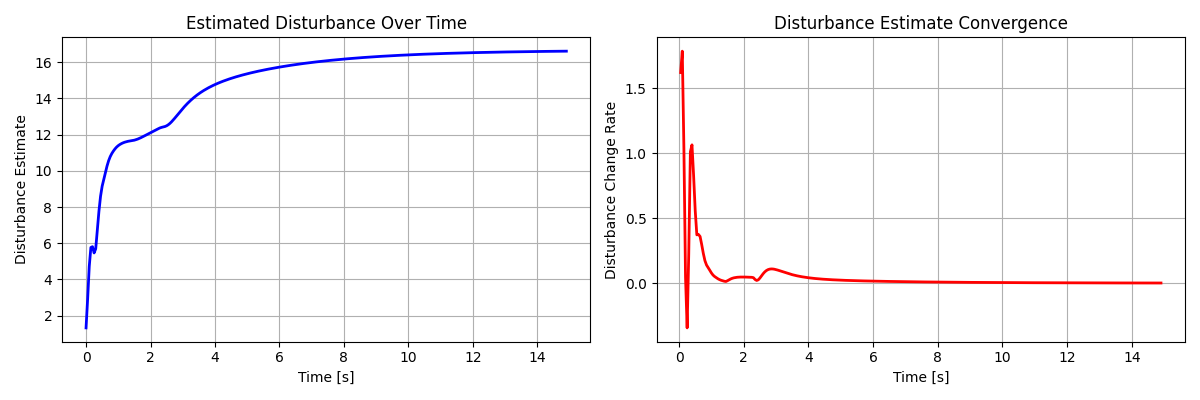


=== Disturbance Estimation Statistics ===
Initial disturbance estimate: 1.3254
Final disturbance estimate: 16.6130
Steady-state disturbance (last 2s avg): 16.5920


In [ ]:
# Plot disturbance estimation over time
d_history = mpc.mpc_z.d_history

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Disturbance estimate
time_steps = np.arange(len(d_history)) * Ts
axes[0].plot(time_steps, d_history, 'b-', linewidth=2)
axes[0].set_xlabel('Time [s]')
axes[0].set_ylabel('Disturbance Estimate')
axes[0].set_title('Estimated Disturbance Over Time')
axes[0].grid(True)

# Disturbance estimate rate of change (to show convergence)
if len(d_history) > 1:
    d_diff = np.diff(d_history)
    axes[1].plot(time_steps[1:], d_diff, 'r-', linewidth=2)
    axes[1].set_xlabel('Time [s]')
    axes[1].set_ylabel('Disturbance Change Rate')
    axes[1].set_title('Disturbance Estimate Convergence')
    axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print disturbance statistics
print(f"\n=== Disturbance Estimation Statistics ===")
print(f"Initial disturbance estimate: {d_history[0]:.4f}")
print(f"Final disturbance estimate: {d_history[-1]:.4f}")
print(f"Steady-state disturbance (last 2s avg): {np.mean(d_history[-int(2/Ts):]):.4f}")



**Design procedure and tuning parameters:**
- Augmented the z-subsystem with a disturbance state: $[v_z, d]^T$
- Observer uses Luenberger form with poles at [0.6, 0.7] fast enough to converge but stable (values from exercices)
- Disturbance matrix $B_d = B$ (mass change affects dynamics like thrust does)
- Terminal set dropped since state estimation breaks recursive feasibility guarantees

**Part 4 vs Part 5 comparison:**
- Part 4 (no offset-free): steady-state offset of ~7.5 m/s due to uncompensated mass mismatch
- Part 5 (offset-free): near-zero offset (~0.12 m/s) thanks to disturbance estimation and compensation

**Is the disturbance constant for constant mass?**

No, the estimated disturbance is not perfectly constant even with `fuel_rate = 0`. Reasons:
1. **Observer transient:** Starts at zero, takes time to converge to steady-state
2. **Model mismatch:** The linearized model is only accurate near the trim point — as the state deviates, the effective "disturbance" changes slightly
3. **Coupling effects:** The decoupled z-controller doesn't account for x/y dynamics coupling

After transients settle (~5s), the estimate becomes approximately constant around ~16.6, which correctly compensates for the mass difference (1.5 kg vs nominal ~1 kg).
